<IPython.core.display.Javascript object>


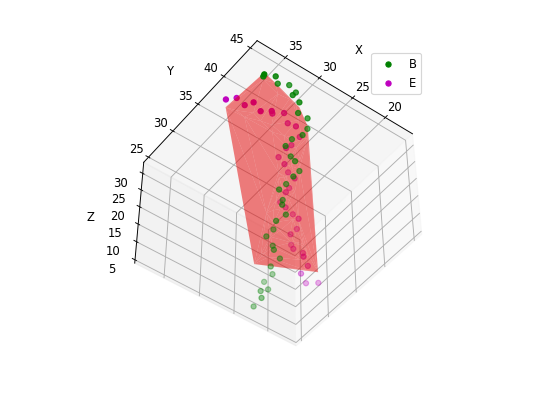

Final loss after rotation: 4.87475349152796
Time elapsed: 0.17365646362304688


ValueError: operands could not be broadcast together with shapes (126,) (69,) 

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import time
from CA_C_N_parsing import x_coord, y_coord, z_coord
from Strands import B_X, B_Y, B_Z, C_X, C_Y, C_Z, E_X, E_Y, E_Z, F_X, F_Y, F_Z

%matplotlib notebook

# Retrieve the coordinates
st = time.time()
x = np.array(x_coord)
y = np.array(y_coord)
z = np.array(z_coord)

# Plot the initial data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(B_X, B_Y, B_Z, label="B", color='g')
#ax.scatter(C_X, C_Y, C_Z, label="C", color='b')
#ax.scatter(F_X, F_Y, F_Z, label="F", color='r')
ax.scatter(E_X, E_Y, E_Z, label="E", color='m')

# Initialize weights and bias
w1 = np.random.rand(1)
w2 = np.random.rand(1)
b = np.random.rand(1)

# Linear regression function to predict z
def f(x, y, w1, w2, b):
    return x * w1 + y * w2 + b

# Learning rate
k = 0.0001


# Gradient Descent
for i in range(400):
    z_pred = f(B_X+E_X,B_Y+E_Y, w1, w2, b)
    loss = (((z_pred -  (B_Z+E_Z)) ** 2).mean())
    
    w1_grad = 2 * ((z_pred - (B_Z+E_Z)) * (B_X+E_X)).mean()
    w2_grad = 2 * ((z_pred - (B_Z+E_Z)) *(B_Y+E_Y) ).mean()
    b_grad = 2 * (z_pred - (B_Z+E_Z)).mean()

    w1 -= k * w1_grad
    w2 -= k * w2_grad
    b -= k * b_grad

# Final prediction
z_pred  = f(B_X+E_X,B_Y+E_Y, w1, w2, b)


# Plot the rotated plane
ax.plot_trisurf(B_X+E_X,B_Y+E_Y,z_pred, color='red', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

# Final loss after rotation
loss = (((z_pred -  (B_Z+E_Z)) ** 2).mean()) ** 0.5
print('Final loss after rotation:', loss)

et = time.time()
print('Time elapsed:', et-st)

above_plane = np.sum(z > z_pred)
below_plane = np.sum(z < z_pred)
print(f"Points above the Plane: {(above_plane/400)*100}%")
print(f"Points below the Plane: {(below_plane/400)*100}%")


In [16]:
A =[1,2,3]
B=[4,5,6]

C=zip(A,B)
A+B

[1, 2, 3, 4, 5, 6]